In [1]:
pip install -U scikit-fuzzy

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894074 sha256=ac33f2da98144f54af49db1a6a6411eadd7178bb764a52a3ff4b427690a6b008
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\2c\04\80\7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedent/Consequent nesneleri, evrensel değişkenleri ve üyelik
# fonksiyonlarını içerir
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'lezzet kalitesi')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'hizmet kalitesi')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'bahşiş')

# .automf(3, 5, veya 7) komutu ile otomatik olarak üyelik fonksiyonu oluşturulabilir
quality.automf(3)
service.automf(3)

# Veya kendi isteğinize özel olarak da üyelik fonksiyonları oluşturulabilir
# Kendinize özel üyelik fonksiyonlarında seviye isimlerini kendiniz belirleyebilirsiniz
# Burada tipik Python API'larındaki syntax geçerli
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

C:\Users\Hp\anaconda33\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


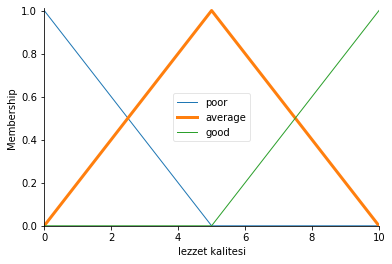

In [16]:
# You can see how these look with .view()
quality['average'].view()

C:\Users\Hp\anaconda33\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


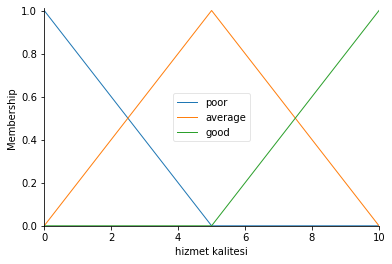

In [17]:
service.view()

C:\Users\Hp\anaconda33\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


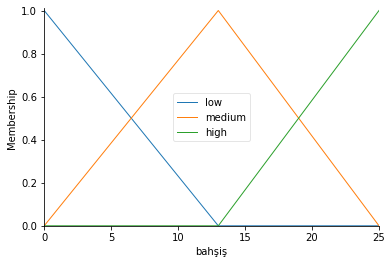

In [2]:
tip.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

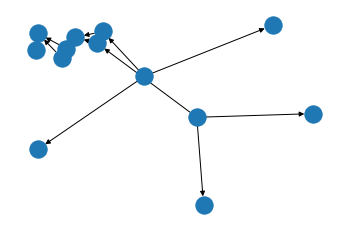

In [5]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

In [6]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [7]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [8]:
# Girdileri besleyelim
# Aynı anda birçok girdi vermek istersek .inputs(dict_of_data) şeklinde verebiliriz
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607361963192


C:\Users\Hp\anaconda33\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


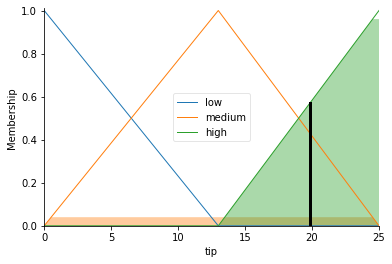

In [10]:
print (tipping.output['tip'])
tip.view(sim=tipping)